In [14]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt

In [15]:

# Use the raw URL to load the file
url = "https://raw.githubusercontent.com/EZags/Milliman-Project-2025/main/Prevalence%20of%20Depression%20Per%20County.csv"
depression_prevalence = pd.read_csv(url)


# Display the DataFrame
depression_prevalence.head()

#Display information about the DataFrame
depression_prevalence.info()

,population,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_eligibility,primary_denominator,analysis_value
0,Medicare Fee For Service,2023,County,Prevalence,Unsmoothed actual,Base measure,Primary chronic conditions,Depression,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,All,"1,000-4,999",18
1,Medicare Fee For Service,2023,County,Prevalence,Unsmoothed actual,Base measure,Primary chronic conditions,Depression,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,All,"10,000+",18
2,Medicare Fee For Service,2023,County,Prevalence,Unsmoothed actual,Base measure,Primary chronic conditions,Depression,All,All,Dual & non-dual,1005,Barbour County,ALABAMA,Rural,All,All,"1,000-4,999",19
3,Medicare Fee For Service,2023,County,Prevalence,Unsmoothed actual,Base measure,Primary chronic conditions,Depression,All,All,Dual & non-dual,1007,Bibb County,ALABAMA,Urban,All,All,"1,000-4,999",24
4,Medicare Fee For Service,2023,County,Prevalence,Unsmoothed actual,Base measure,Primary chronic conditions,Depression,All,All,Dual & non-dual,1009,Blount County,ALABAMA,Urban,All,All,"1,000-4,999",22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3241 entries, 0 to 3240
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   population           3241 non-null   object
 1   year                 3241 non-null   int64 
 2   geography            3241 non-null   object
 3   measure              3241 non-null   object
 4   adjustment           3241 non-null   object
 5   analysis             3241 non-null   object
 6   domain               3241 non-null   object
 7   condition            3241 non-null   object
 8   primary_sex          3241 non-null   object
 9   primary_age          3241 non-null   object
 10  primary_dual         3241 non-null   object
 11  fips                 3241 non-null   int64 
 12  county               3205 non-null   object
 13  state                3241 non-null   object
 14  urban                3241 non-null   object
 15  primary_race         3241 non-null   object
 16  primar

In [16]:
#Remove unnecessary columns in the depression prevalence DataFrame
depression_prevalence.rename(columns={
    'analysis_value' : "dep_prevalence",
}, inplace=True)
depression_prevalence = depression_prevalence[['year','measure','condition','fips','county','state','dep_prevalence']]
depression_prevalence['fips'] = depression_prevalence['fips'].astype(str).str.zfill(5)

print(depression_prevalence.shape[0])
depression_prevalence.head(15)

3241


,year,measure,condition,fips,county,state,dep_prevalence
0,2023,Prevalence,Depression,01001,Autauga County,ALABAMA,18
1,2023,Prevalence,Depression,01003,Baldwin County,ALABAMA,18
2,2023,Prevalence,Depression,01005,Barbour County,ALABAMA,19
3,2023,Prevalence,Depression,01007,Bibb County,ALABAMA,24
4,2023,Prevalence,Depression,01009,Blount County,ALABAMA,22
5,2023,Prevalence,Depression,01011,Bullock County,ALABAMA,14
6,2023,Prevalence,Depression,01013,Butler County,ALABAMA,15
7,2023,Prevalence,Depression,01015,Calhoun County,ALABAMA,22
8,2023,Prevalence,Depression,01017,Chambers County,ALABAMA,18
9,2023,Prevalence,Depression,01019,Cherokee County,ALABAMA,25


<Figure size 800x600 with 0 Axes>

(array([  11.,    8.,   80.,  297., 1033., 1069.,  637.,   91.,   13.,
           2.]),
 array([ 0. ,  3.5,  7. , 10.5, 14. , 17.5, 21. , 24.5, 28. , 31.5, 35. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram of COPD Prevalence')

Text(0.5, 0, 'Depression Prevalence')

Text(0, 0.5, 'Number of Counties')

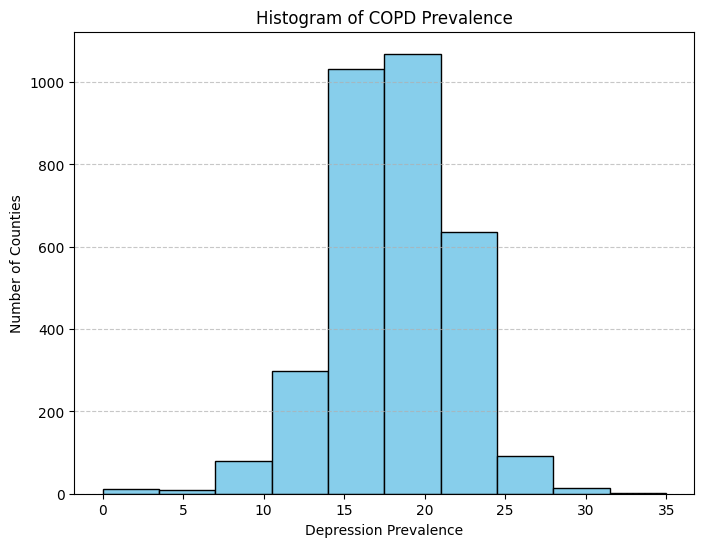

In [17]:
# Plot the histogram of depression_prevalence
plt.figure(figsize=(8, 6))  # Set figure size
plt.hist(depression_prevalence["dep_prevalence"], bins=10, color="skyblue", edgecolor="black")
plt.title("Histogram of COPD Prevalence")
plt.xlabel("Depression Prevalence")
plt.ylabel("Number of Counties")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Optional grid for clarity
plt.show()

In [ ]:
#Asahi
#Emilio